<a href="https://colab.research.google.com/github/JustinChiu10/CP468-AI/blob/main/CP468_%E2%80%93_Artificial_Intelligence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gradio
!pip install --upgrade keras-cv
!pip install --upgrade keras-nlp
!pip install --upgrade keras
!curl -O https://www.kaggle.com/datasets/apollo2506/facial-recognition-dataset/download?datasetVersionNumber=3
from google.colab import files
files.upload()

%pwd
%ls
#from google.colab import files
#files.upload()

!unzip "archive.zip"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7

Streaming output truncated to the last 5000 lines.
  inflating: Training/Training/Sad/Sad-370.jpg  
  inflating: Training/Training/Sad/Sad-3700.jpg  
  inflating: Training/Training/Sad/Sad-3701.jpg  
  inflating: Training/Training/Sad/Sad-3702.jpg  
  inflating: Training/Training/Sad/Sad-3703.jpg  
  inflating: Training/Training/Sad/Sad-3704.jpg  
  inflating: Training/Training/Sad/Sad-3705.jpg  
  inflating: Training/Training/Sad/Sad-3706.jpg  
  inflating: Training/Training/Sad/Sad-3707.jpg  
  inflating: Training/Training/Sad/Sad-3708.jpg  
  inflating: Training/Training/Sad/Sad-3709.jpg  
  inflating: Training/Training/Sad/Sad-371.jpg  
  inflating: Training/Training/Sad/Sad-3710.jpg  
  inflating: Training/Training/Sad/Sad-3711.jpg  
  inflating: Training/Training/Sad/Sad-3712.jpg  
  inflating: Training/Training/Sad/Sad-3713.jpg  
  inflating: Training/Training/Sad/Sad-3714.jpg  
  inflating: Training/Training/Sad/Sad-3715.jpg  
  inflating: Training/Training/Sad/Sad-3716.jpg  
 

Found 28273 files belonging to 6 classes.
Found 7067 files belonging to 6 classes.
Training dataset:
Number of batches: 884
Batch shape (images): (32, 48, 48, 3)
Batch shape (labels): (32,)
Number of training samples: 32

Testing dataset:
Number of batches: 221
Batch shape (images): (32, 48, 48, 3)
Batch shape (labels): (32,)
Number of testing samples: 32

Class names in the dataset: ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']


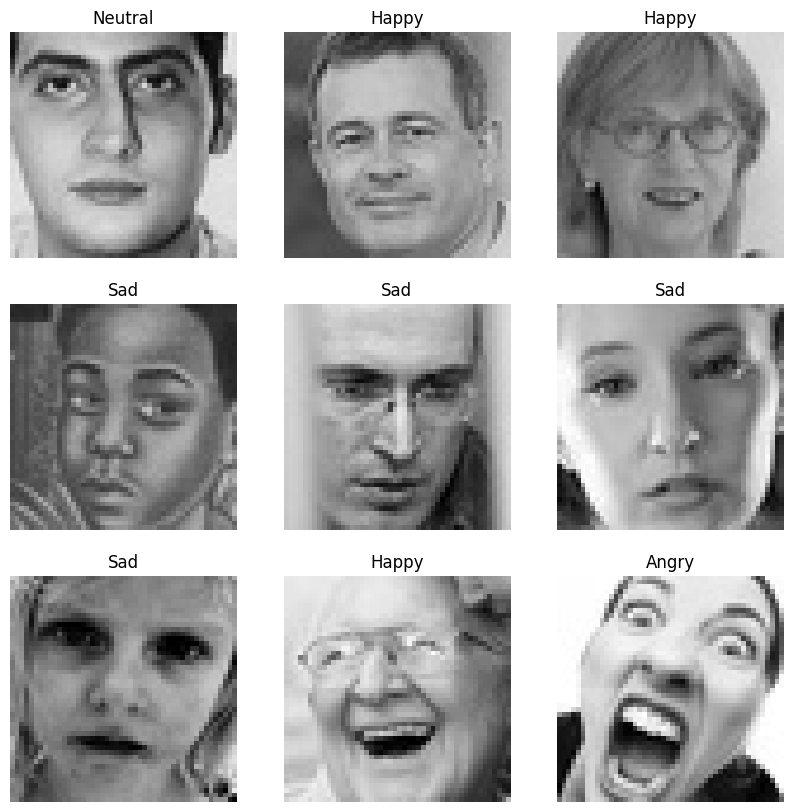

In [ ]:
import gradio
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
#dataset  has been unzipped into Testing and Training folder within "content/sampledata"
import numpy as np
import tensorflow as tf

#Set the directory paths for data

train_dir = "Training/Training"
test_dir = "Testing/Testing"


#Create training dataset
%pwd
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(48,48),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

#Create testing dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(48,48),
    batch_size=32,
    label_mode='int',
    shuffle=True
)
class_names = train_dataset.class_names

#Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

print("Training dataset:")
print(f"Number of batches: {tf.data.experimental.cardinality(train_dataset)}")
for images, labels in train_dataset.take(1):
    print(f"Batch shape (images): {images.shape}")
    print(f"Batch shape (labels): {labels.shape}")
    print(f"Number of training samples: {images.shape[0]}")


print("\nTesting dataset:")
print(f"Number of batches: {tf.data.experimental.cardinality(test_dataset)}")
for images, labels in test_dataset.take(1):
    print(f"Batch shape (images): {images.shape}")
    print(f"Batch shape (labels): {labels.shape}")
    print(f"Number of testing samples: {images.shape[0]}")


print(f"\nClass names in the dataset: {class_names}")



import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))  # Sets up the figure size
for images, labels in test_dataset.take(1):  # Takes a single batch from the dataset
    for i in range(9):  # Loop through the first 9 images of the batch
        ax = plt.subplot(3, 3, i + 1)  # Creates a subplot for each image
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')  # Display image
        plt.title(class_names[labels[i]])  # Displays the title as the class name
        plt.axis("off")  # Turns off the axis
plt.show()

In [ ]:
#import tensorflow as tf
#def add_noise(img, noise_level=0.3):
    #"""
    #Add salt-and-pepper noise to the image.
    #noise_level: percentage of image pixels to be noised.
    #"""
    # Create a noise mask
    #rnd = tf.random.uniform(tf.shape(img), minval=0.4, maxval=1)
    #noise_mask = tf.cast(rnd < noise_level, tf.float32)

    # Create noise
    #noise = tf.random.uniform(tf.shape(img), minval=0.4, maxval=1)
    #black_or_white = tf.cast(noise < 0.5, tf.float32)  # Half chance for black or white

    # Apply noise
    #noised_image = img * (1 - noise_mask) + black_or_white * noise_mask
    #return noised_image

#def process_image(image, label):
    # Apply data augmentation here if needed
    #noised_image = add_noise(image, noise_level=0.4)  # Adjust noise level as necessary
    #return (image, label), (noised_image, label)

# Apply the function and flatten the resulting dataset
#augmented_train_dataset = train_dataset.map(
    #process_image,
    #num_parallel_calls=tf.data.experimental.AUTOTUNE
#).flat_map(lambda x, y: tf.data.Dataset.from_tensors(x).concatenate(tf.data.Dataset.from_tensors(y)))






#plt.figure(figsize=(10, 10))  # Sets up the figure size
#for images, labels in train_dataset.take(1):  # Takes a single batch from the dataset
    #for i in range(9):  # Loop through the first 9 images of the batch
        #ax = plt.subplot(3, 3, i + 1)  # Creates a subplot for each image
        #plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')  # Display image
        # Use labels directly if they are sparse
        #plt.title(class_names[labels[i]])  # Displays the title as the class name
        #plt.axis("off")  # Turns off the axis
#plt.show()  # Display the figure with the images

In [ ]:
#import tensorflow as tf
#from tensorflow.keras import layers

# Define data augmentation
#data_augmentation = tf.keras.Sequential([
    #layers.RandomFlip("horizontal"),
    #layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1)
#])

#augmented_train_dataset = augmented_train_dataset.map(
    #lambda x, y: (data_augmentation(x, training=True), y),  # Apply augmentation
    #num_parallel_calls=tf.data.AUTOTUNE
#)

# Configure the dataset for performance
#augmented_train_dataset = augmented_train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# Count elements in train_dataset
#train_dataset_size = sum(1 for _ in train_dataset)
#print(f"The total number of images/batches in train_dataset is: {train_dataset_size}")

# Count elements in augmented_train_dataset
#augmented_train_dataset_size = sum(1 for _ in augmented_train_dataset)
#print(f"The total number of images/batches in augmented_train_dataset is: {augmented_train_dataset_size}")


The total number of images/batches in train_dataset is: 884
The total number of images/batches in augmented_train_dataset is: 1768


In [ ]:
#import tensorflow as tf
#from tensorflow.keras import layers, Sequential
#from tensorflow.keras.regularizers import l1_l2

#epochs = 40
#num_classes = len(class_names)

#model = Sequential([
    #layers.Rescaling(1./255, input_shape=(48, 48, 3)),
    #layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    #layers.MaxPooling2D(),
    #layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    #layers.MaxPooling2D(),
    #layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.4),  # Dropout for regularization
    #layers.Flatten(),
    #layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    #layers.Dense(num_classes, activation='softmax')  # Changed from logits if using softmax
#])

#model.compile(
    #optimizer='rmsprop',
    #loss='sparse_categorical_crossentropy',  # Adjusted loss function if using softmax
    #metrics=['accuracy']
#)

#model.summary()

#history = model.fit(
    #augmented_train_dataset,
    #validation_data=test_dataset,
    #epochs=epochs
#)

# Gather the accuracy and loss values for plotting
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs_range = range(epochs)

# Plotting training and validation metrics
#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc='lower right')
#plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()


**From Scratch Model**

Number of layers in the base model:  11


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_96 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,694 (4.86 MB)

 Trainable params: 1,274,694 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2879 - loss: 1.9090 - val_accuracy: 0.4293 - val_loss: 1.5232
Epoch 2/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4308 - loss: 1.5228 - val_accuracy: 0.4828 - val_loss: 1.4298
Epoch 3/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4741 - loss: 1.4442 - val_accuracy: 0.4958 - val_loss: 1.3974
Epoch 4/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5011 - loss: 1.4070 - val_accuracy: 0.5207 - val_loss: 1.3433
Epoch 5/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5180 - loss: 1.3675 - val_accuracy: 0.5149 - val_loss: 1.4248
Epoch 6/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5286 - loss: 1.3479 - val_accuracy: 0.5258 - val_loss: 1.3410
Epoch 7/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5325 - loss: 1.3416 - val_accuracy: 0.5446 - val_loss: 1.3127
Epoch 8/30
884/884 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5405 - loss: 1.3241 - val_accuracy: 0

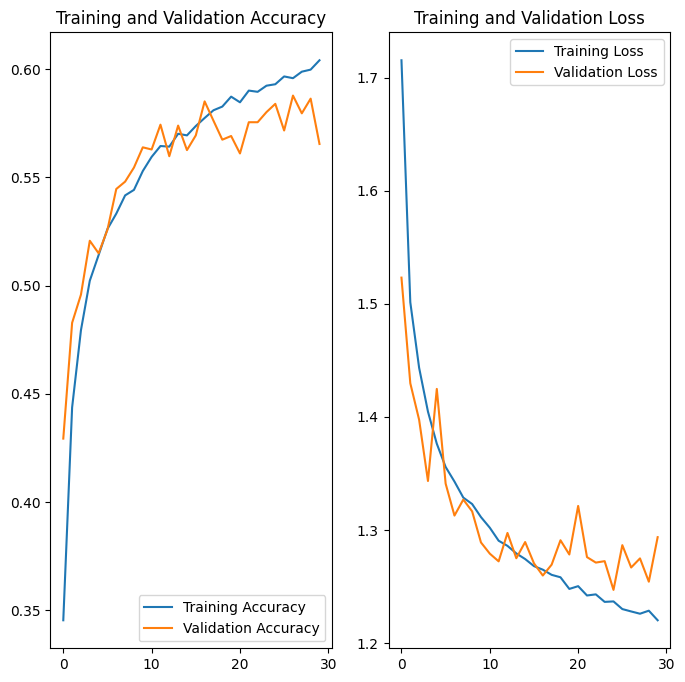

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras import regularizers

epochs = 30
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(48, 48, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(num_classes)
])

print("Number of layers in the base model: ", len(model.layers))


model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30 )

model.save('my_model.keras')


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

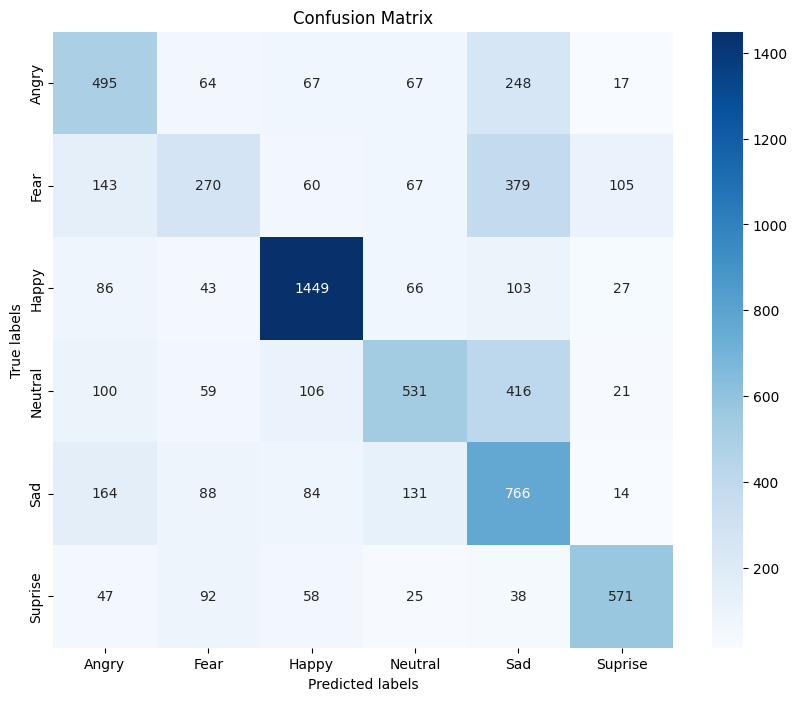

ROC-AUC: 0.7473115846847592


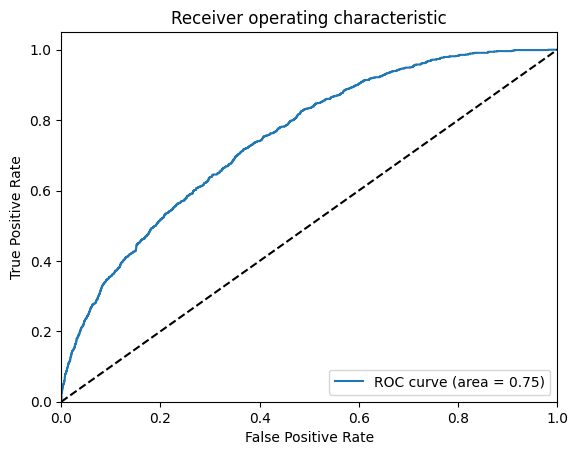

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf

# Initialize lists to store true labels and predictions
true_classes = []
predicted_classes = []
predicted_probs = []  # Store probabilities for computing ROC-AUC

# Iterate through each batch in the dataset
for images, labels in test_dataset:
    # Make predictions for the current batch
    batch_predictions = model.predict(images)
    batch_predicted_classes = np.argmax(batch_predictions, axis=1)

    # Store predictions and true labels
    predicted_classes.extend(batch_predicted_classes.tolist())
    true_classes.extend(labels.numpy().tolist())
    predicted_probs.extend(batch_predictions[:, 1].tolist())

# Convert lists to numpy arrays for confusion matrix computation
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)
predicted_probs = np.array(predicted_probs)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(len(class_names)))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Compute AUC-ROC for class 1
roc_auc = roc_auc_score(true_classes == 1, predicted_probs)  # Binary ROC-AUC for class 1
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_classes == 1, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**ResNet50 Model**

In [ ]:
#from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Resizing

#inputs = tf.keras.Input(shape=(48, 48, 3))
#resized_inputs = Resizing(224, 224, interpolation='bilinear')(inputs)
#import tensorflow as tf

#if tf.test.gpu_device_name():
    #print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
#else:
    #print("Please install GPU version of TF")


Default GPU Device: /device:GPU:0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Number of layers in the base model:  175
Found 28273 images belonging to 6 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


884/884 ━━━━━━━━━━━━━━━━━━━━ 165s 162ms/step - accuracy: 0.4154 - loss: 1.7820 - val_accuracy: 0.5214 - val_loss: 1.2586
Epoch 2/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 126s 142ms/step - accuracy: 0.5607 - loss: 1.1909 - val_accuracy: 0.6090 - val_loss: 1.0296
Epoch 3/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 140s 140ms/step - accuracy: 0.5822 - loss: 1.1147 - val_accuracy: 0.6203 - val_loss: 1.0267
Epoch 4/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 123s 139ms/step - accuracy: 0.6081 - loss: 1.0523 - val_accuracy: 0.6305 - val_loss: 0.9859
Epoch 5/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 123s 139ms/step - accuracy: 0.6229 - loss: 1.0029 - val_accuracy: 0.6356 - val_loss: 0.9675
Epoch 6/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 124s 140ms/step - accuracy: 0.6412 - loss: 0.9797 - val_accuracy: 0.6162 - val_loss: 1.0573
Epoch 7/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 141s 139ms/step - accuracy: 0.6524 - loss: 0.9418 - val_accuracy: 0.6486 - val_loss: 0.9972
Epoch 8/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 123s 139ms/step - accuracy: 0.6672 - loss: 0.92

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,780,558 (163.19 MB)

 Trainable params: 17,084,422 (65.17 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

 Optimizer params: 17,084,424 (65.17 MB)

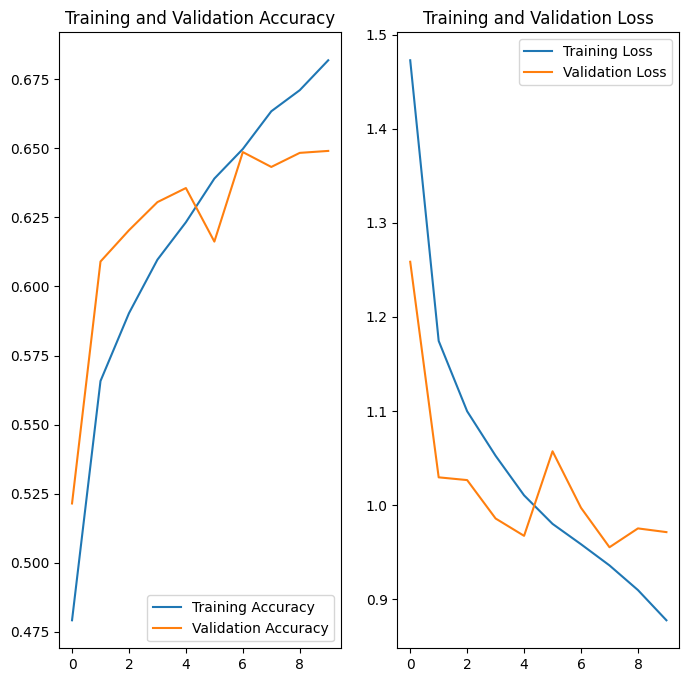

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Resizing, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the number of classes
num_classes = 6

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))
print("Number of layers in the base model: ", len(base_model.layers))


# Adjust the trainability of the base model layers
for layer in base_model.layers[:-35]:  # Unfreeze more layers
    layer.trainable = False ###removed negative to experiment
for layer in base_model.layers[-35:]:
    layer.trainable = True

inputs = tf.keras.Input(shape=(48, 48, 3))
resized_inputs = Resizing(224, 224)(inputs)
x = base_model(resized_inputs, training=True)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=inputs, outputs=predictions)

model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.15
)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(48, 48),
                                                    batch_size=32, class_mode='binary')

history = model2.fit(train_generator, epochs=10, validation_data=test_dataset, callbacks=[early_stopping])

model2.summary()

epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model2.save('my_model2.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━

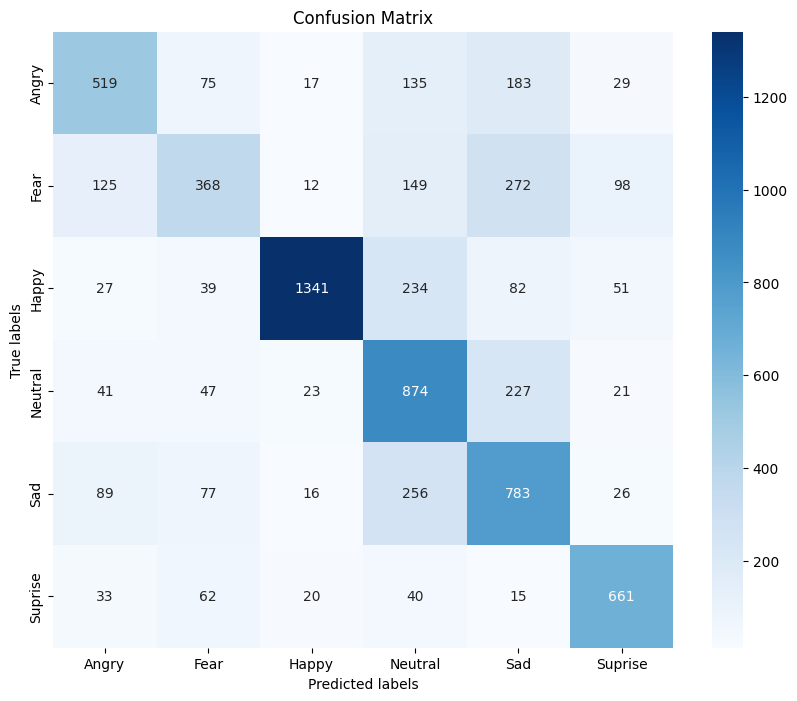

ROC-AUC: 0.8261755110510094


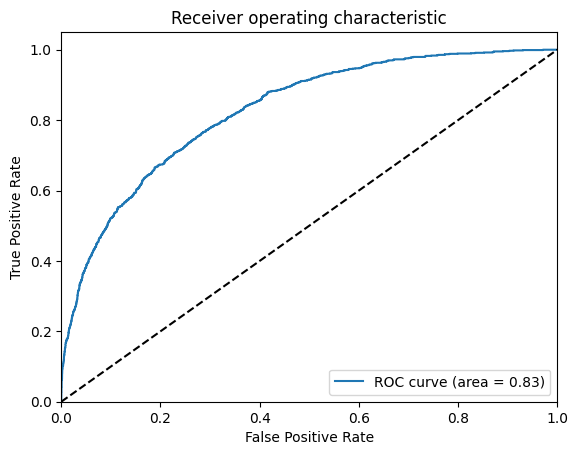

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf

# Initialize lists to store true labels and predictions
true_classes = []
predicted_classes = []
predicted_probs = []  # Store probabilities for computing ROC-AUC

# Iterate through each batch in the dataset
for images, labels in test_dataset:
    # Make predictions for the current batch
    batch_predictions = model2.predict(images)
    batch_predicted_classes = np.argmax(batch_predictions, axis=1)

    # Store predictions and true labels
    predicted_classes.extend(batch_predicted_classes.tolist())
    true_classes.extend(labels.numpy().tolist())
    predicted_probs.extend(batch_predictions[:, 1].tolist())

# Convert lists to numpy arrays for confusion matrix computation
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)
predicted_probs = np.array(predicted_probs)

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(len(class_names)))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Compute AUC-ROC for class 1
roc_auc = roc_auc_score(true_classes == 1, predicted_probs)  # Binary ROC-AUC for class 1
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_classes == 1, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**MobileNetV2 Model**

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Number of layers in the base model:  154
Number of layers in model3:  6
Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1768/1768 ━━━━━━━━━━━━━━━━━━━━ 133s 57ms/step - accuracy: 0.3439 - loss: 1.5991 - val_accuracy: 0.4764 - val_loss: 1.3448
Epoch 2/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.4996 - loss: 1.2868 - val_accuracy: 0.5330 - val_loss: 1.1923
Epoch 3/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.5407 - loss: 1.1926 - val_accuracy: 0.5688 - val_loss: 1.1282
Epoch 4/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.5715 - loss: 1.1147 - val_accuracy: 0.5769 - val_loss: 1.0893
Epoch 5/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.5973 - loss: 1.0691 - val_accuracy: 0.5953 - val_loss: 1.0508
Epoch 6/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6094 - loss: 1.0213 - val_accuracy: 0.5994 - val_loss: 1.0467
Epoch 7/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6205 - loss: 0.9904 - val_accuracy: 0.6104 - val_loss: 1.0286
Epoch 8/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.6317 - loss: 0.9

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_1 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,098,110 (27.08 MB)

 Trainable params: 3,522,230 (13.44 MB)

 Non-trainable params: 53,648 (209.56 KB)

 Optimizer params: 3,522,232 (13.44 MB)

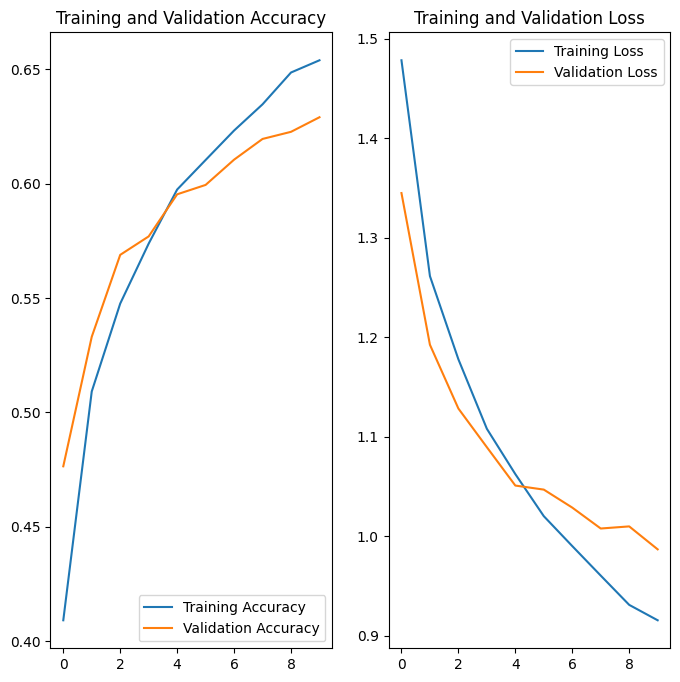

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Resizing
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define the number of classes
num_classes = 6

# Load pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Start with freezing the base model

# Create new input layer to resize images
inputs = Input(shape=(48, 48, 3))
resized_inputs = Resizing(224, 224)(inputs)

# Pass the resized images through the base model
x = base_model(resized_inputs, training=False)

# Add custom layers on top for facial expression classification
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Compile the model
model3 = Model(inputs=inputs, outputs=predictions)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Number of layers in the base model: ", len(base_model.layers))
print("Number of layers in model3: ", len(model3.layers))


# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 30  # Start fine-tuning from the 100th layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

#  lower learning rate for fine-tuning
base_learning_rate = 0.0001
model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation setup
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=16,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=16,
    class_mode='categorical'
)

# Setup Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

initial_epochs = 10
#fine_tune_epochs = 10
#total_epochs = initial_epochs + fine_tune_epochs

history = model3.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Print the model summary
model3.summary()

epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

model3.save('my_model3.keras')


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 7067 images belonging to 6 classes.
221/221 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step


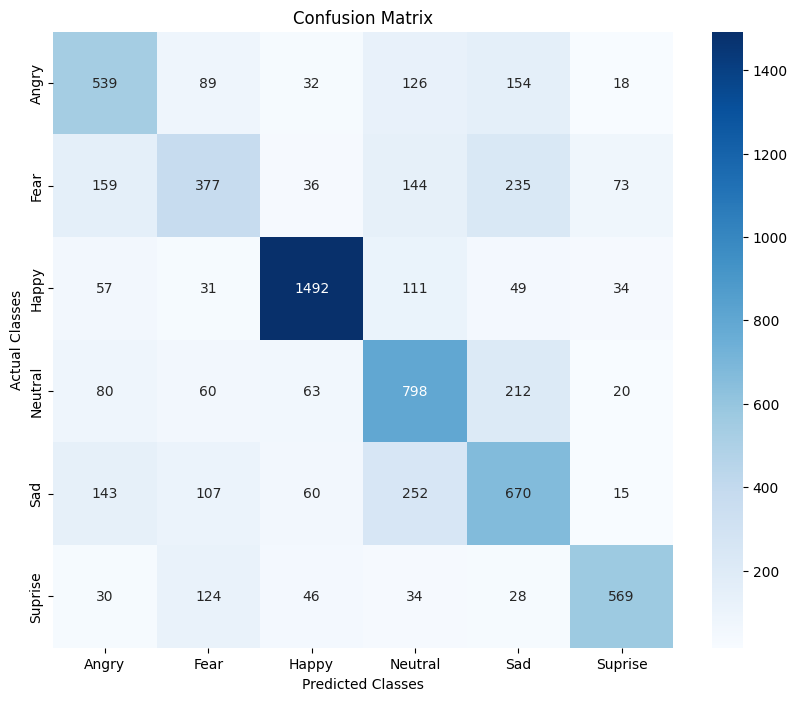

ROC-AUC: 0.8003353893451101


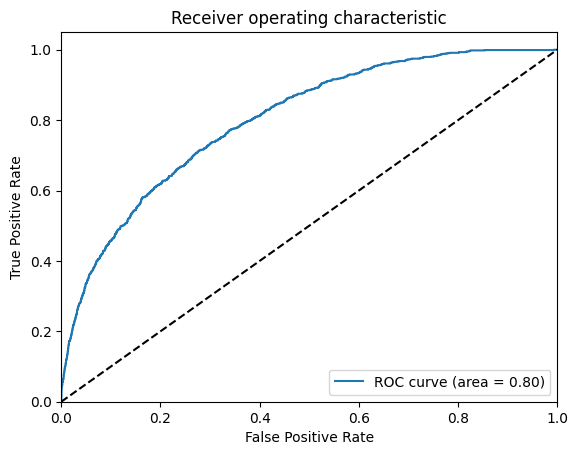

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf

# Initialize arrays to store predictions
predicted_probs = []

# First, ensure your validation generator does not shuffle data to match predictions with true labels
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Calculate the steps per epoch for validation
steps_per_epoch = int(np.ceil(validation_generator.samples / 32))  # Convert to integer

# Predict the entire validation set
predictions = model3.predict(validation_generator, steps=steps_per_epoch)

# Store the probabilities for the positive class
predicted_probs = predictions[:, 1]

# Get the true labels
true_classes = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, np.argmax(predictions, axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

# Compute AUC-ROC
roc_auc = roc_auc_score(true_classes == 1, predicted_probs)  # Binary ROC-AUC for class 1
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_classes == 1, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**InceptionV3 Model**

Number of layers in the base model:  311
Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


884/884 ━━━━━━━━━━━━━━━━━━━━ 357s 339ms/step - accuracy: 0.2312 - loss: 1.8757 - val_accuracy: 0.4449 - val_loss: 1.4161
Epoch 2/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 298s 286ms/step - accuracy: 0.4123 - loss: 1.4890 - val_accuracy: 0.5421 - val_loss: 1.1983
Epoch 3/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 263s 288ms/step - accuracy: 0.4896 - loss: 1.3033 - val_accuracy: 0.5704 - val_loss: 1.1084
Epoch 4/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 255s 289ms/step - accuracy: 0.5320 - loss: 1.1975 - val_accuracy: 0.5925 - val_loss: 1.0498
Epoch 5/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 262s 288ms/step - accuracy: 0.5673 - loss: 1.1212 - val_accuracy: 0.6137 - val_loss: 0.9992
Epoch 6/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 280s 308ms/step - accuracy: 0.5903 - loss: 1.0690 - val_accuracy: 0.6246 - val_loss: 0.9775
Epoch 7/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 304s 288ms/step - accuracy: 0.6117 - loss: 1.0206 - val_accuracy: 0.6342 - val_loss: 0.9513
Epoch 8/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 262s 288ms/step - accuracy: 0.6242 - loss: 0.99

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_1 (Resizing)                │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,771,950 (178.42 MB)

 Trainable params: 22,864,838 (87.22 MB)

 Non-trainable params: 1,042,272 (3.98 MB)

 Optimizer params: 22,864,840 (87.22 MB)

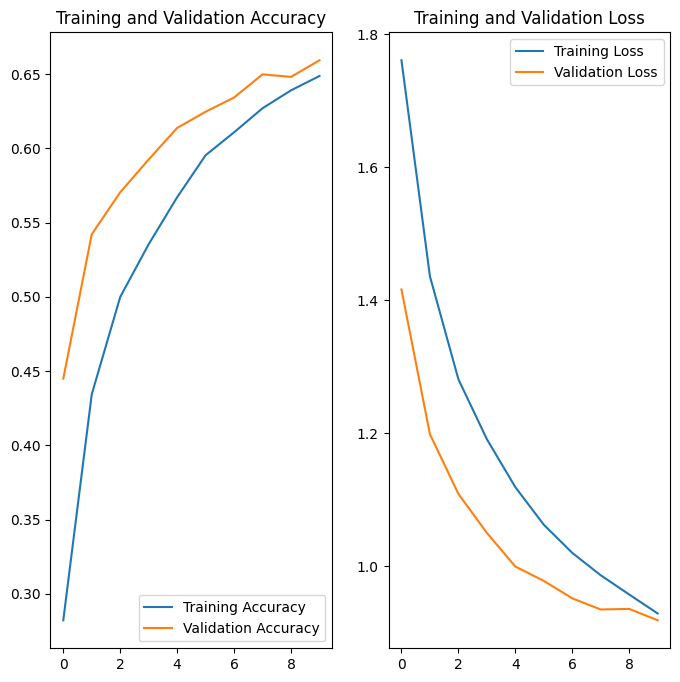

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Resizing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Resizing, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define the number of classes
num_classes = 6

# Load pre-trained InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze the base model initially
print("Number of layers in the base model: ", len(base_model.layers))


# Create new input layer to handle different input sizes, if necessary
inputs = Input(shape=(48, 48, 3))
resized_inputs = Resizing(299, 299)(inputs)  # Resize images to the expected input size

# Pass the resized images through the base model
x = base_model(resized_inputs, training=False)

# Add custom layers on top for facial expression classification
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Compile the model
model4 = Model(inputs=inputs, outputs=predictions)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Unfreeze some layers in the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 90  # Typically, InceptionV3 might be fine-tuned from this layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Lower the learning rate for fine-tuning
base_learning_rate = 0.0001
model4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation setup
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Setup Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model
history = model4.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Print the model summary
model4.summary()


epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

model4.save('my_model4.keras')


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 7067 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step


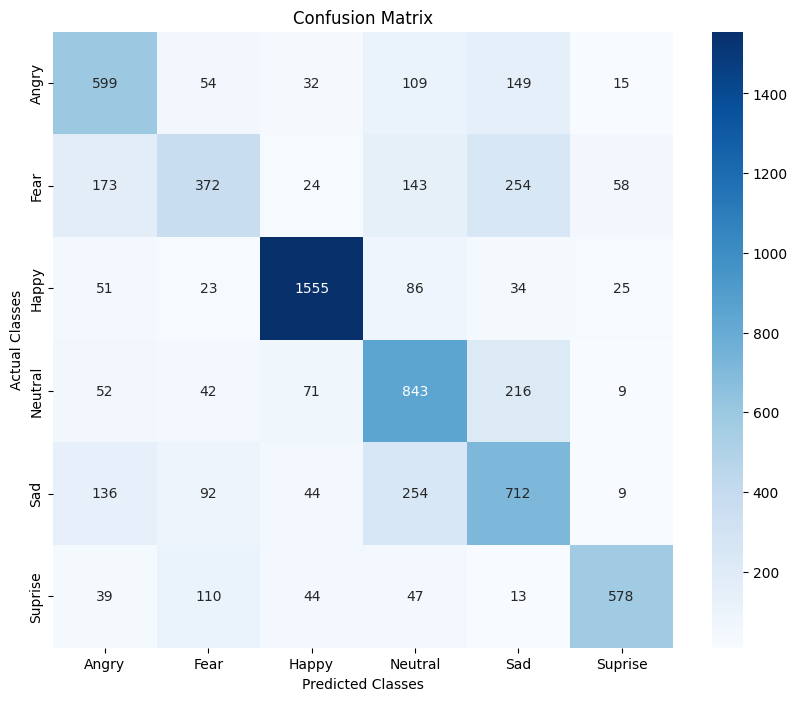

ROC-AUC: 0.8208926521388383


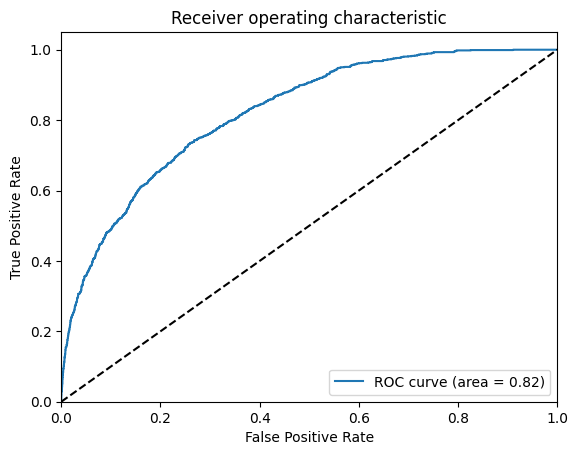

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf

# Initialize arrays to store predictions
predicted_probs = []

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Calculate the steps per epoch for validation
steps_per_epoch = int(np.ceil(validation_generator.samples / 32))

# Predict the entire validation set
predictions = model4.predict(validation_generator, steps=steps_per_epoch)

# Store the probabilities for the positive class
predicted_probs = predictions[:, 1]

# Get the true labels
true_classes = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, np.argmax(predictions, axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

# Compute AUC-ROC
roc_auc = roc_auc_score(true_classes == 1, predicted_probs)  # Binary ROC-AUC for class 1
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_classes == 1, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**Ensemble Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Concatenate, Dense, Input, Resizing, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class EnsembleModel(Model):
    def __init__(self, modelA, modelB, modelC, num_classes):
        super(EnsembleModel, self).__init__()
        self.modelA = modelA  # ResNet50
        self.modelB = modelB  # MobileNetV2
        self.modelC = modelC  # InceptionV3
        self.modelC.trainable = False

        # Inputs are initially in the smallest common shape
        self.inputs = Input(shape=(48, 48, 3))

        # Ensuring models are not trainable
        self.modelA.trainable = False
        self.modelB.trainable = False

        # Resizing for each model
        self.resizeA_B = Resizing(224, 224)  # For ResNet50 and MobileNetV2
        self.resizeC = Resizing(299, 299)    # For InceptionV3

        # Combining outputs
        self.concatenate = Concatenate()

        # Final classifier
        self.classifier = Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Resizing inputs for each model
        inputs = tf.cast(inputs, tf.float32) / 255.0  # Normalize inputs
        inputsA_B = self.resizeA_B(inputs)
        inputsC = self.resizeC(inputs)

        # Get outputs from each model
        outputA = self.modelA(inputs)
        outputB = self.modelB(inputs)
        outputC = self.modelC(inputs)

        # Concatenate outputs
        combined = self.concatenate([outputA, outputB, outputC])

        # Final classification
        return self.classifier(combined)

    def get_config(self):
        config = super(EnsembleModel, self).get_config()
        config.update({
            'modelA': tf.keras.layers.serialize(self.modelA),
            'modelB': tf.keras.layers.serialize(self.modelB),
            'modelC': tf.keras.layers.serialize(self.modelC),
            'num_classes': self.classifier.units
        })
        return config

    @classmethod
    def from_config(cls, config):
        modelA = tf.keras.layers.deserialize(config.pop('modelA'))
        modelB = tf.keras.layers.deserialize(config.pop('modelB'))
        modelC = tf.keras.layers.deserialize(config.pop('modelC'))
        num_classes = config.pop('num_classes')
        return cls(modelA, modelB, modelC, num_classes)

    def get_build_config(self):
        return {'input_shape': (48, 48, 3)}

    def build_from_config(self, config):
        input_shape = config.get('input_shape', (48, 48, 3))
        self.build(input_shape)


num_classes = 6
ensemble_model = EnsembleModel(model2, model3, model4, num_classes)

ensemble_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model on your dataset
history = ensemble_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stopping]

)




Epoch 1/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 317s 324ms/step - accuracy: 0.4292 - loss: 0.0000e+00 - val_accuracy: 0.6622 - val_loss: 0.0000e+00
Epoch 2/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 236s 267ms/step - accuracy: 0.7217 - loss: 0.0000e+00 - val_accuracy: 0.6662 - val_loss: 0.0000e+00
Epoch 3/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 261s 266ms/step - accuracy: 0.7225 - loss: 0.0000e+00 - val_accuracy: 0.6673 - val_loss: 0.0000e+00
Epoch 4/10
884/884 ━━━━━━━━━━━━━━━━━━━━ 262s 266ms/step - accuracy: 0.7207 - loss: 0.0000e+00 - val_accuracy: 0.6672 - val_loss: 0.0000e+00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Average, Dense, Input, Resizing
from tensorflow.keras.models import Model

# For avg outputs of ensemble, run this to show ensemble in Gradio



# Ensure the pre-trained models are not trainable
model2.trainable = False
model3.trainable = False
model4.trainable = False

# Define the input layer
input_layer = Input(shape=(48, 48, 3))

# Resize the inputs for each model
resized_input_224 = Resizing(224, 224)(input_layer)
resized_input_299 = Resizing(299, 299)(input_layer)

# Get the outputs of each model
outputA = model2(input_layer)
outputB = model3(input_layer)
outputC = model4(input_layer)

average_output = Average()([outputA, outputB, outputC])

# Final classification layer
output_layer = Dense(6, activation='softmax')(average_output)

# Define the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
ensemble_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Save the ensemble mode l
ensemble_model.save("ensemble_model.keras")


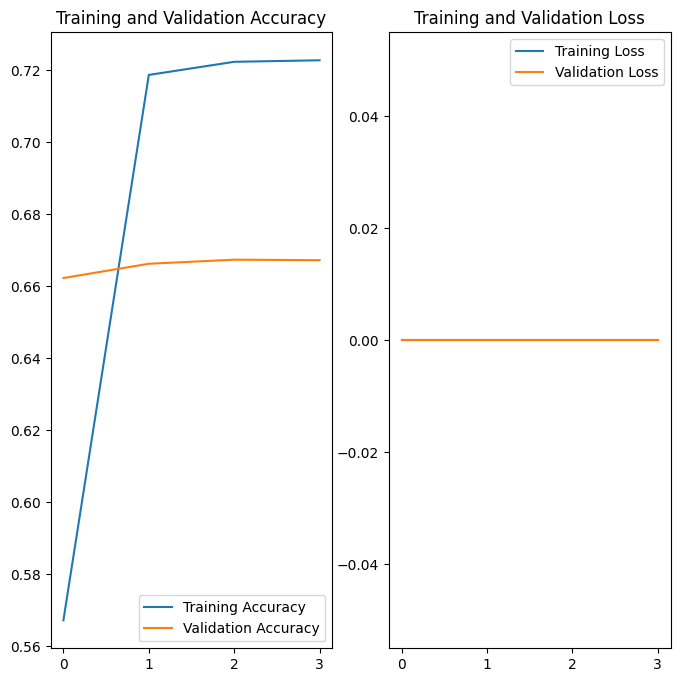

In [ ]:
epochs= 4
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()




In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

labels = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
# Load models
model_gr = tf.keras.models.load_model("my_model.keras")
model2_gr = tf.keras.models.load_model("my_model2.keras")
model3_gr = tf.keras.models.load_model("my_model3.keras")
model4_gr = tf.keras.models.load_model("my_model4.keras")
model_en = tf.keras.models.load_model("ensemble_model.keras")

def preprocess_image(img):
    # Convert the image to PIL format
    img = Image.fromarray(img)

    # Resize the image to 48x48
    img = img.resize((48, 48))

    # Convert the image to RGB
    img = img.convert("RGB")

    # Convert the image to numpy array and reshape for the model input
    arr = np.array(img).reshape((-1, 48, 48, 3))

    return arr

def classify_image_keras(img):
    arr = preprocess_image(img)
    # Make prediction with Keras model
    prediction = model_gr.predict(arr).flatten()
    return {f"Keras Model - {labels[i]}": float(prediction[i]) for i in range(len(labels))}

def classify_image_model2(img):
    arr = preprocess_image(img)
    # Make prediction with model2
    prediction = model2_gr.predict(arr).flatten()
    return {f"Model2 - {labels[i]}": float(prediction[i]) for i in range(len(labels))}

def classify_image_model3(img):
    arr = preprocess_image(img)
    # Make prediction with model3
    prediction = model3_gr.predict(arr).flatten()
    return {f"Model3 - {labels[i]}": float(prediction[i]) for i in range(len(labels))}

def classify_image_model4(img):
    arr = preprocess_image(img)
    # Make prediction with model4
    prediction = model4_gr.predict(arr).flatten()
    return {f"Model4 - {labels[i]}": float(prediction[i]) for i in range(len(labels))}

def classify_image_ensemble(img):
    arr = preprocess_image(img)
    # Make prediction with ensemble
    prediction = model_en.predict(arr).flatten()
    return {f"Ensemble - {labels[i]}": float(prediction[i]) for i in range(len(labels))}

# Create separate input and label components for each tab
with gr.Blocks() as demo:
    with gr.Tab("Keras Model"):
        imagein1 = gr.Image()
        label1 = gr.Label(num_top_classes=6)
        m1 = gr.Interface(fn=classify_image_keras, inputs=imagein1, outputs=label1)
    with gr.Tab("ResNet50"):
        label2 = gr.Label(num_top_classes=6)
        m2 = gr.Interface(fn=classify_image_model2, inputs=imagein1, outputs=label2)
    with gr.Tab("MobileNetV2"):
        label3 = gr.Label(num_top_classes=6)
        m3 = gr.Interface(fn=classify_image_model3, inputs=imagein1, outputs=label3)
    with gr.Tab("InceptionV3"):
        label4 = gr.Label(num_top_classes=6)
        m4 = gr.Interface(fn=classify_image_model4, inputs=imagein1, outputs=label4)
    with gr.Tab("Ensemble"):
        label5 = gr.Label(num_top_classes=6)
        m5 = gr.Interface(fn=classify_image_ensemble, inputs=imagein1, outputs=label5)

demo.launch() # Launch the corrected Gradio interface

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 132 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 140 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas t

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c3f61c331fcc797850.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Below are other models that we tried out but yielded worse results. Please do not run any of these cells


In [ ]:
from tensorflow.keras import regularizers
num_classes = 6 # 'Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise'
input_shape = (48,48,3) #48x48 images with 1 color channels
# Define L2 regularizer
l2_regularizer = regularizers.l2(0.0001)

model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),  # Keeping higher dropout
    keras.layers.Dense(num_classes, activation="softmax"),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Print model summary to verify the updates
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,022 (367.27 KB)

 Trainable params: 94,022 (367.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import regularizers

# Define L2 regularizer
l2_regularizer = regularizers.l2(0.00001)

model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2_regularizer),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.6),  # Increased dropout rate

    keras.layers.Dense(num_classes, activation="softmax"),
])

#Compile the model:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',  # Use this for one-hot encoded label
    metrics=['accuracy']
)

model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,146,950 (4.38 MB)

 Trainable params: 1,146,950 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Building the model:
num_classes = 6 # 'Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise'
input_shape = (48,48,3) #48x48 images with 1 color channels

model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_classes, activation="softmax"),
])

#Compile the model:

model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss='sparse_categorical_crossentropy',  # Use this for one-hot encoded labels
    metrics=['accuracy']
)
#print model summary
model.summary()




Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,146,950 (4.38 MB)

 Trainable params: 1,146,950 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Define the batch size and number of epochs
batch_size = 32
epochs = 20

#define callbacks for saving the model and early stopping
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras", save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001, mode='auto')  #adjusted learning rate
]

#Splitting the train_dataset to get a validation set

#val_size = int(len(train_dataset) * 0.15) #Taking 15% of training data as validation
#train_data = train_dataset.skip(val_size) #Skipping the first 15%
#val_data = train_dataset.take(val_size) #Taking the first 15% as validation
# Configure the datasets for performance
#AUTOTUNE = tf.data.AUTOTUNE
#train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
#train the model :
history = model.fit(
    augmented_train_dataset,
    validation_data=test_dataset,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

#evaluate the model on the test set:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose = 0)
print(f"Test Loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")



Epoch 1/20
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1504s 850ms/step - accuracy: 0.2539 - loss: 1.7591 - val_accuracy: 0.2870 - val_loss: 55.8887 - learning_rate: 5.0000e-05
Epoch 2/20
 617/1768 ━━━━━━━━━━━━━━━━━━━━ 15:56 831ms/step - accuracy: 0.2922 - loss: 1.6966

KeyboardInterrupt: 

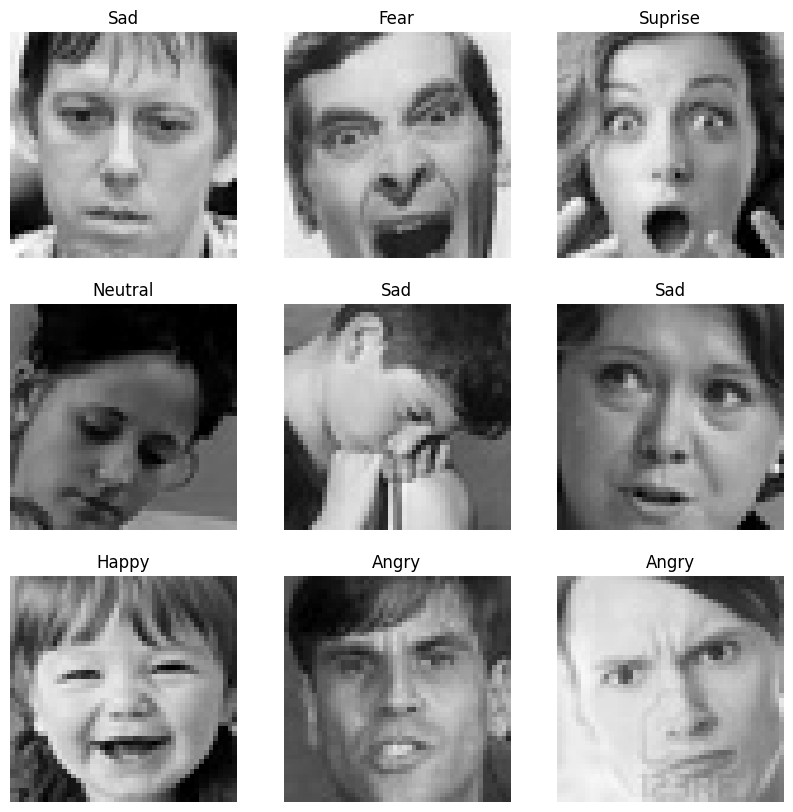

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 10))  # Sets up the figure size
for images, labels in test_dataset.take(1):  # Takes a single batch from the dataset
    for i in range(9):  # Loop through the first 9 images of the batch
        ax = plt.subplot(3, 3, i + 1)  # Creates a subplot for each image
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')  # Display image, note the cmap='gray'
        plt.title(class_names[np.argmax(labels[i])])  # Displays the title as the class name
        plt.axis("off")  # Turns off the axis
plt.show()  # Display the figure with the images

In [ ]:
#Reserve this space for image augmentation if necessary

from tensorflow.keras import layers

# Define data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    layers.RandomRotation(0.2),  # Randomly rotate images by 20%
    layers.RandomZoom(0.1),  # Randomly zoom images by 10%
    layers.RandomContrast(0.1)  # Randomly change contrast by 10%
])

# Apply augmentation to the training dataset
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

# Configure the augmented dataset for performance
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, 48, 48, 1)            0         ['input_4[0][0]']             
                                                                                                  
 rescaling_1 (Rescaling)     (None, 48, 48, 1)            0         ['sequential_4[0][0]']        
                                                                                                  
 conv2d_16 (Conv2D)          (None, 24, 24, 128)          1280      ['rescaling_1[0][0]']         
                                                                                            

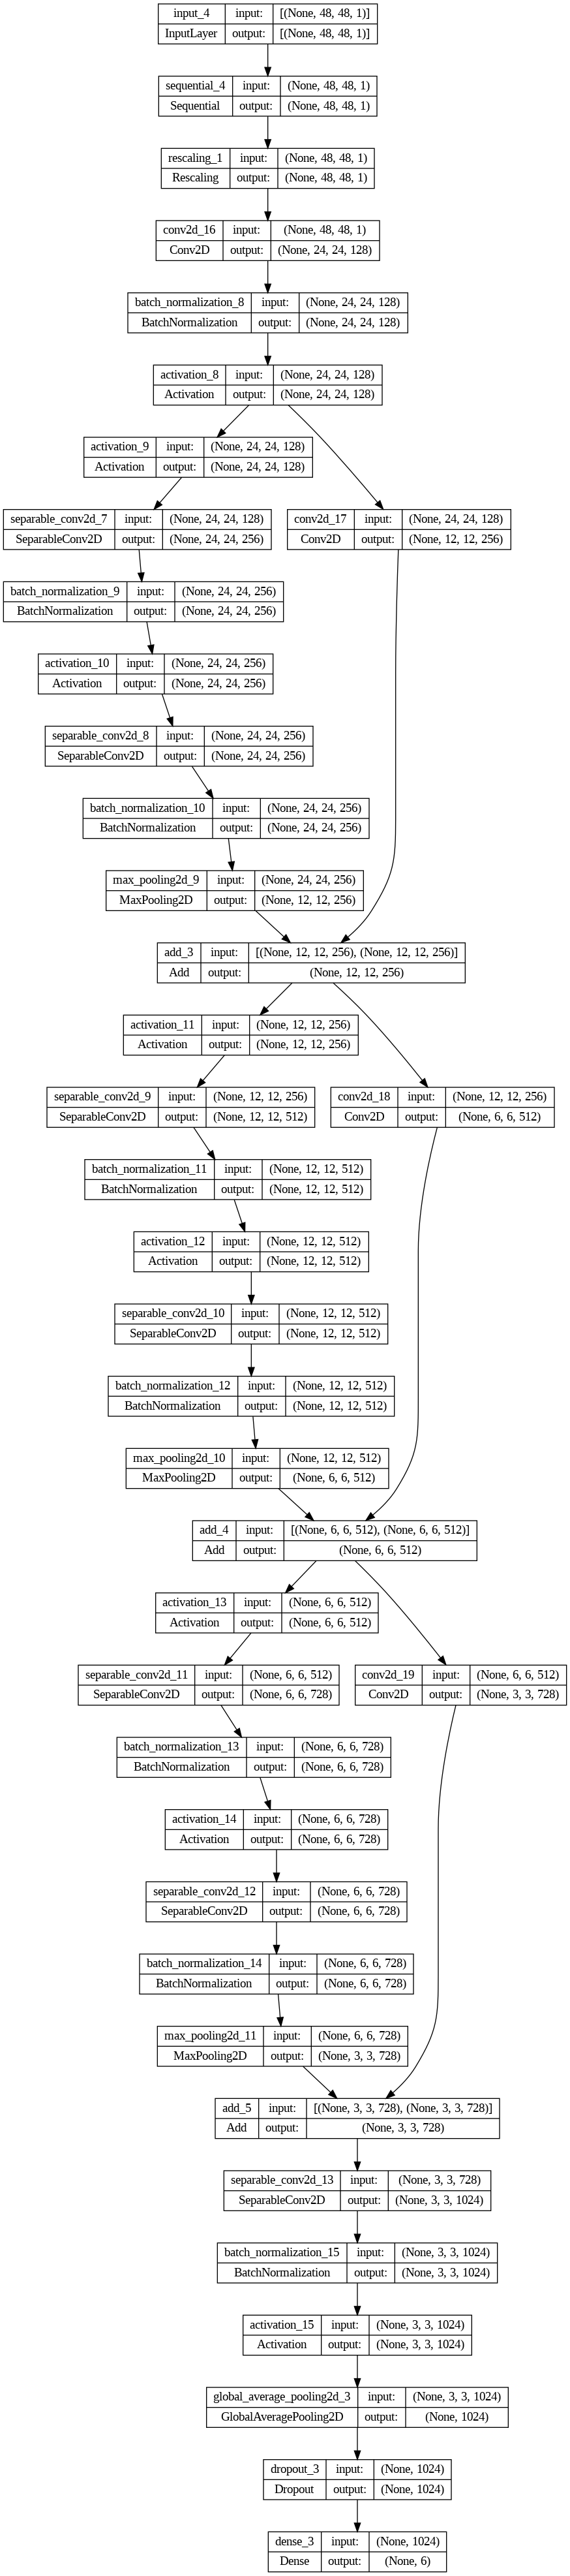

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Data augmentation
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.25)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)  # Use softmax for multi-class

    return keras.Model(inputs, outputs)

image_size = (48, 48)
num_classes = 6

# Create the model
model = make_model(input_shape=image_size + (1,), num_classes=num_classes)  # (1,) for grayscale
model.summary()  # Display summary

##TRYING THIS
#model.compile(
    #optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),
    #loss='categorical_crossentropy',  # Use this for one-hot encoded labels
    #metrics=['accuracy']
#)

# Optional: Plot model architecture
keras.utils.plot_model(model, show_shapes=True)


In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras", save_best_only=True, monitor='val_acc', mode='max'),
]

# Compiling the model with appropriate multi-class classification loss and metrics
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),  # Learning rate
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),  # Correct loss for multi-class
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],  # Correct accuracy metric for multi-class
)

# Fit the model on the training data while validating on validation data
history = model.fit(
    augmented_train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


  4/177 [..............................] - ETA: 4:37 - loss: 1.8922 - acc: 0.2422

KeyboardInterrupt: 